# 1 -  Introduction

This lesson covers
- Forms of machine learning beyond classification and regression
- Formal evaluation procedures for machine learning models
- Preparing data for deep learning
- Feature engineering
- Tackling overfitting
- The universal workflow for approaching machine learning problems

# 2 - Four branches of machine learning

- **Supervised learning**
    - This is by far the most common case. It consists of learning to map input data to known targets (also called annotations), given a set of examples (often annotated by humans). **Supervised learning by far is the dominant form of deep learning today, with a wide range of industry applications.**
- **Unsupervised learning**
    - This branch of machine learning consists of finding interesting transformations of the input data without the help of any targets, for the purposes of data visualization, data compression, or data denoising, or to better understand the correlations present in the data at hand. Unsupervised learning is the bread and butter of data analytics, and it’s often a necessary step in better understanding a dataset before attempting to solve a supervised-learning problem. **Dimensionality reduction** and **clustering** are well-known categories of unsupervised learning.
- **Self-supervised learning**
    - It is a supervised learning without human-annotated labels (they’re generated from the input data, typically using a
heuristic algorithm).
- **Reinforcement learning**
    - In reinforcement learning, an agent receives information about its environment and learns to choose actions that
will maximize some reward. Currently, reinforcement learning is mostly a research area and hasn’t yet had significant
practical successes beyond games. In time, however, we expect to see reinforcement learning take over an increasingly large range of real-world applications: self-driving cars, robotics, resource management, education, and so on. It’s an idea
whose time has come, or will come soon.

# 3 - Evaluating machine-learning models

In machine learning, the goal is to achieve models that **generalize** — that perform well on never-before-seen data—and **overfitting** is the central obstacle. In this section, we’ll focus on **how to measure generalization**: how to evaluate machine-learning models.



## 3.1 Training, validation and test sets

Evaluating a model always boils down to splitting the available data into three sets: 

- **training**
- **validation**
- **test**

You train on the training data and evaluate your model on the validation data. Once your model is ready for prime time, you test it one final time on the test data.

Splitting your data into training, validation, and test sets may seem straightforward, but there are a few advanced ways to do it that can come in handy when little data is available.

- **Hold-out validation**
- **K-Fold**
- **Iterated K-Fold validation with shuffling**

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1zP9sqXEYvfNLyII_avHuF9JYk2-gBF0O">


### 3.1.1 Hold-out validation

```python
# Hold-out validation pseudo-code
num_validation_samples = 10000
# Shuffling the data is usually appropriate.
np.random.shuffle(data)
# Defines the validation set
validation_data = data[:num_validation_samples]
data = data[num_validation_samples:]
# Defines the training set
training_data = data[:]
# Trains a model on the training data, and evaluates it on the validation data
model = get_model()
model.train(training_data)
validation_score = model.evaluate(validation_data)
# At this point you can tune your model, retrain it, evaluate it, tune it again...
# Once you’ve tuned your hyperparameters, it’s common to train your final model
# from scratch on all non-test data available.
model = get_model()
model.train(np.concatenate([training_data,
validation_data]))
test_score = model.evaluate(test_data)
```

### 3.1.2 K-Fold validation



```python
# K-Fold Validation
k = 4
num_validation_samples = len(data) // k
np.random.shuffle(data)
validation_scores = []
for fold in range(k):
    # Selects the validation data partition
    validation_data = data[num_validation_samples * fold:num_validation_samples * (fold + 1)]
    # Uses the remainder of the data as training data. Note that the + operator is list concatenation, not summation
    training_data = data[:num_validation_samples * fold] + data[num_validation_samples * (fold + 1):]
    # Creates a brand-new instance of the model (untrained)
    model = get_model()
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
# Validation score: average of the validation scores of the k folds
validation_score = np.average(validation_scores)
# Trains the final model on all nontest data available
model = get_model()
model.train(data)
test_score = model.evaluate(test_data)
```


### 3.1.3 - Iterated K-Fold Validation with Shuffling


This one is for situations in which **you have relatively little data available** and you need to evaluate your model as precisely as possible. This solution have been  extremely helpful in **Kaggle competitions**. It consists of:

1. Applying K-fold validation multiple times
2. Shuffling the data every time before splitting it K ways. 
3. The final score is the average of the scores obtained at each run of K-fold validation. 
4. Note that you end up training and evaluating P × K models (where P is the number of iterations you use), which can very expensive.

## 3.2 Data preprocessing and feature engineering

In addition to model evaluation, an important question we must tackle before we dive deeper into model development is the following: how do you prepare the input data and targets before feeding them into a neural network?

###  3.2.1 Data preprocessing

Data preprocessing aims at making the raw data at hand more amenable to neural networks. This includes:
- **vectorization**
- **normalization**
- **handling missing values**
- **feature extraction**

### 3.2.2 Feature engineering

The essence of **feature engineering** is making a problem easier by **expressing it in a simpler way**. It usually requires understanding the problem in depth.

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=14dhxjfqcJlg4SCQHURYhLHPuDKQgoWfT">

Modern deep learning removes the need for most feature engineering, because neural networks are capable of automatically extracting useful features from raw data. Does this mean you don’t have to worry about feature engineering as
long as you’re using deep neural networks? No, for two reasons:

- **Good features** still allow you to solve problems more elegantly while **using fewer resources**. For instance, it would be ridiculous to solve the problem of reading a clock face using a convolutional neural network.
- **Good features** let you solve a problem with far **less data**. The ability of deep learning models to learn features on their own relies on having lots of training data available; if you have only a few samples, then the information value in
their features becomes critical.

## 3.3 Overfitting and underfitting

At the **beginning of training**, optimization and generalization are correlated: **the lower the loss on training data, the lower the loss on test data**. While this is happening, your model is said to be **underfit**: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. 

But after a certain number of iterations on the training data, **generalization stops improving, and validation metrics stall and then begin to degrade**: the model is starting to **overfit**. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.

To prevent a model from learning misleading or irrelevant patterns found in the training data, the best solution is to get more training data. 
- **A model trained on more data will naturally generalize better**. 

When that isn’t possible, the next-best solution:
- to modulate the quantity of information that your model is allowed to store
- to add constraints on what information it’s allowed to store. 

If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the **most prominent patterns**, which have a better chance of generalizing well. The processing of fighting overfitting this way is called **regularization**.

## 3.3.1 Regularization

These are the most common ways to prevent overfitting in neural networks:
- Get more training data.
- Reduce the capacity of the network.
- Add weight regularization.
- Add dropout.

### 3.3.1.1 Reducing the network’s size

The general workflow to find an appropriate model size is:

1. Start with relatively few layers and parameters
2. Increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss

Let’s try this on the movie-review classification network:

- Original model
```python
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```

- Version of the model with lower capacity
```python
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```

- Version of the model with higher capacity
```python
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```

<table>
<tr>
    <td> <img src="https://drive.google.com/uc?export=view&id=1VMkzNR_R8ODITTtwCAmLZzjIZfJTN11x" width="400"> </td>
    <td> <img src="https://drive.google.com/uc?export=view&id=1-C0mb-NPmlyCFv-HMkSbATOVywmC9LVZ" width="400"> </td>
</tr>
</table>

As you can see, **the smaller network starts overfitting later** than the reference network (after six epochs rather than four), and its performance degrades more slowly once it starts overfitting.

**The bigger network starts overfitting almost immediately**, after just one epoch, and it overfits much more severely. Its validation loss is also noisier.


### 3.3.1.2 Adding weight regularization

**A common way to mitigate overfitting** is to put constraints on the complexity of a network by **forcing its weights to take only small values**, which makes the distribution of weight values more regular. This is called **weight regularization**, and it’s done by adding to the loss function of the network a cost associated with having large weights.

- **L1 regularization**
    - The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
- **L2 regularization**
    - The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights)
    
```python
# Adding L2 weight regularization to the model
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
```

<table>
<tr>
    <td> <img src="https://drive.google.com/uc?export=view&id=1WwK9JJhPyf_WcYlB1LabnRvWuTLjVQNy" width="400"> </td>
</tr>
</table>

As you can see, the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters.

### 3.3.1.3 Adding dropout

**Dropout** is one of the most effective and most commonly used regularization techniques for neural networks, developed by [Geoff Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton) and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training.

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1RXqlzlb7oN7Q3e5ojctwmEXBUCk1ode2">

This technique may seem strange and arbitrary. Why would this help reduce overfitting? Hinton says he was inspired by, among other things, a fraud-prevention mechanism used by banks. In his own words, “I went to my bank. The tellers kept changing
and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly **removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting**.”

- The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that aren’t significant (what Hinton refers to as conspiracies), which the network will start memorizing if no noise is present.

```python
# Adding dropout to the IMDB network
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
```

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1PjdL0qXfg2AqwiY5Yp7H_lx8pnw-ETZD">

# 4 - The universal workflow of machine learning



1. **Defining the problem and assembling a dataset**
    - you must define the problem at hand
    - machine learning can only be used to memorize patterns that are present in your training data. You can only recognize what you’ve seen before.
2. **Choosing a measure of success**
    - your metric for success will guide the choice of a loss function: what your model will optimize.
3. **Deciding on an evaluation protocol**
    - hold-out validation set
    - K-fold cross-validation
    - iterated K-fold validation
    - note: in most cases, the first will work well enough
4. **Preparing your data**
    - your data should be formatted as **tensors**.
    - the values taken by these tensors should usually be scaled to small values (-1,1) or (0,1)
    - if different features take values in different ranges, then the data should be **normalized**.
    - you may want to do some **feature engineering**, especially for **small-data problems**.
5. **Developing a model that does better than a baseline**
    - you need to make three key choices to build your first working model
    
    <img width="600" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1Td3XWIeYStS600Swrp0G-Brne9P-BrAw">

6. **Scaling up: developing a model that overfits**
    - add layers.
    - make the layers bigger.
    - train for more epochs.
    - note: when you see that the model’s performance on the validation data begins to degrade, you’ve achieved overfitting
    
7. **Regularizing your model and tuning your hyperparameters**
    - Add dropout.
    - Try different architectures: add or remove layers.
    - Add L1 and/or L2 regularization
    - Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration.
    - Optionally, iterate on feature engineering: add new features, or remove features that don’t seem to be informative.

# 5 - Case study

**Remember!!!**

Universal workflow of machine learning

1. **Defining the problem and assembling a dataset**
2. **Choosing a measure of success**
3. **Deciding on an evaluation protocol**
4. **Preparing your data**
5. **Developing a model that does better than a baseline**
6. **Scaling up: developing a model that overfits**
7. **Regularizing your model and tuning your hyperparameters**

##  5.1 - Introduction to Kaggle



[Kaggle](https://www.kaggle.com/) is a site where people create algorithms and compete against machine learning practitioners around the world. Your algorithm wins the competition if it's the most accurate on a particular data set. Kaggle is a fun way to practice your machine learning skills.

In this chapter we're going to learn how to compete in Kaggle competitions. In this introductory mission we'll learn how to:

- Approach a Kaggle competition
- Explore the competition data and learn about the competition topic
- Prepare data for machine learning
- Train a model
- Measure the accuracy of your model
- Improving the features we train our model on
- Prepare and make your first Kaggle submission.

Kaggle has created a number of competitions designed for beginners. The most popular of these competitions, and the one we'll be looking at, is about predicting which [passengers survived the sinking of the Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic).

In this competition, we have a data set of different information about passengers onboard the Titanic, and we see if we can use that information to predict whether those people survived or not. Before we start looking at this specific competition, let's take a moment to understand how Kaggle competitions work.

Each Kaggle competition has two key data files that you will work with - a **training set** and a **testing set**.

The training set contains data we can use to train our model. It has a number of feature columns which contain various descriptive data, as well as a column of the target values we are trying to predict: in this case, **Survival**.

The testing set contains all of the same feature columns, but is missing the target value column. Additionally, the testing set usually has fewer observations (rows) than the training set.

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1ESRBXN3nOU5H3_WxljfLiDBjfXdgzyfM">

This is useful because we want as much data as we can to train our model on. Once we have trained our model on the training set, we will use that model to make predictions on the data from the testing set, and submit those predictions to Kaggle.

[In this competition](https://www.kaggle.com/c/titanic/data), the two files are named **test.csv** and **train.csv**. We'll start by using the pandas library to read both files and inspect their size.

In [1]:
import pandas as pd

df_test = pd.read_csv("test.csv", sep = ",")
df_train = pd.read_csv("train.csv", sep = ",")

train_shape = df_train.shape
test_shape = df_test.shape

print('Train:' + str(train_shape) + "\nTest: " + str(test_shape))

Train:(891, 12)
Test: (418, 11)


## 5.2 - Exploring the Data




The files we read in the previous screen are available on [the data page for the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic/data). That page also has a **data dictionary**, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

- **PassengerID** - A column added by Kaggle to identify each row and make submissions easier
- **Survived** - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- **Pclass** - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- **Sex** - The passenger's sex
- **Age** - The passenger's age in years
- **SibSp** - The number of siblings or spouses the passenger had aboard the Titanic
- **Parch** - The number of parents or children the passenger had aboard the Titanic
- **Ticket** - The passenger's ticket number
- **Fare** - The fare the passenger paid
- **Cabin** - The passenger's cabin number
- **Embarked** - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

The data page on Kaggle has some additional notes about some of the columns. It's always worth exploring this in detail to get a full understanding of the data.

The first 5 rows of the data is below:


In [2]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
!pip install missingno

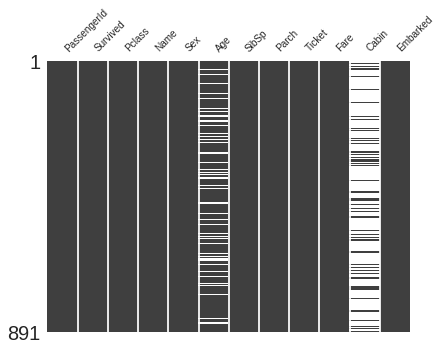

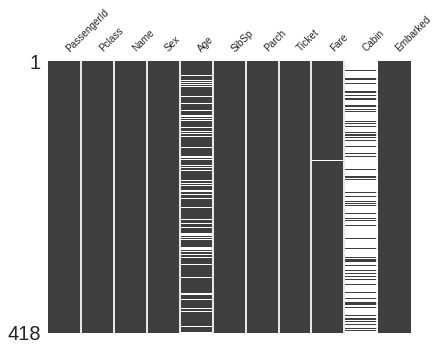

In [6]:
import missingno as msno
%matplotlib inline
# missing values - Train
msno.matrix(df_train, figsize=(6.5,5), fontsize=10, sparkline=False) 

# missing values - Test
msno.matrix(df_test, figsize=(6.5,5), fontsize=10, sparkline=False) 

The type of machine learning we will be doing is called **classification**, because when we make predictions we are classifying each passenger as survived or not. More specifically, we are performing **binary classification**, which means that there are only two different states we are classifying.

In any machine learning exercise, thinking about the topic you are predicting is very important. We call this step acquiring domain knowledge, and it's one of the most important determinants for success in machine learning.

In this case, understanding the Titanic disaster and specifically what variables might affect the outcome of survival is important. Anyone who has watched the movie Titanic would remember that women and children were given preference to lifeboats (as they were in real life). You would also remember the vast class disparity of the passengers.


<img width="1000" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1S1-LlDSgyNmqhTjATBQezZY_jlldOwDS">

This indicates that **Age**, **Sex**, **PClass**, **Embarked** and **Family Size** may be good predictors of survival. 

Because the **Survived** column contains 0 if the passenger did not survive and 1 if they did, we can segment our data using **DataFrame.pivot_table()**. 

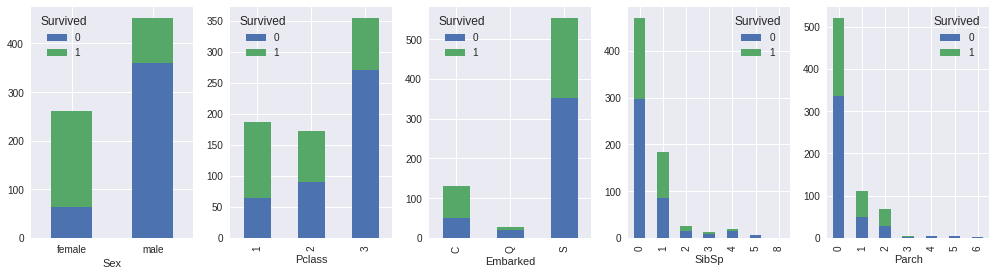

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(14,4))

sex_pivot = df_train.pivot_table(index="Sex",columns="Survived",values="Age",aggfunc="count")
sex_pivot.plot.bar(ax=ax1,stacked=True)
ax1.tick_params(rotation=0)

class_pivot = df_train.pivot_table(index="Pclass",columns="Survived",values="Age",aggfunc="count")
class_pivot.plot.bar(ax=ax2,stacked=True)

embark_pivot = df_train.pivot_table(index="Embarked",columns="Survived",values="Age",aggfunc="count")
embark_pivot.plot.bar(ax=ax3,stacked=True)

sib_pivot = df_train.pivot_table(index="SibSp",columns="Survived",values="Age",aggfunc="count")
sib_pivot.plot.bar(ax=ax4,stacked=True)

parch_pivot = df_train.pivot_table(index="Parch",columns="Survived",values="Age",aggfunc="count")
parch_pivot.plot.bar(ax=ax5,stacked=True)


f.tight_layout()

plt.show()


### 5.2.1 - Gender vs class vs survived vs age

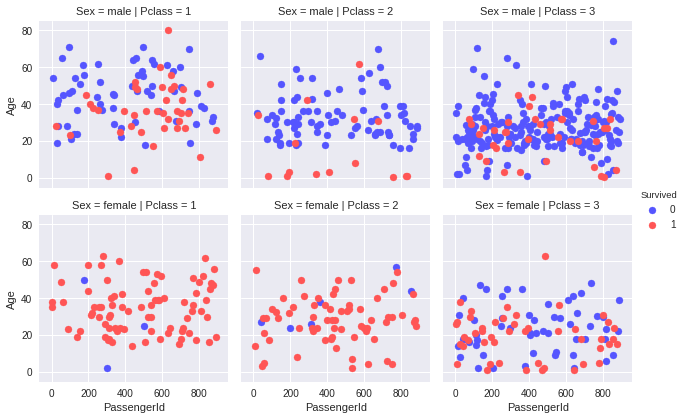

In [10]:
grid = sns.FacetGrid(df_train, col = "Pclass", row = "Sex", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

**Remark**
What did you conclude from the previous figure?

### 5.2.2 - Embarked vs Pclass vs Survivied vs Age

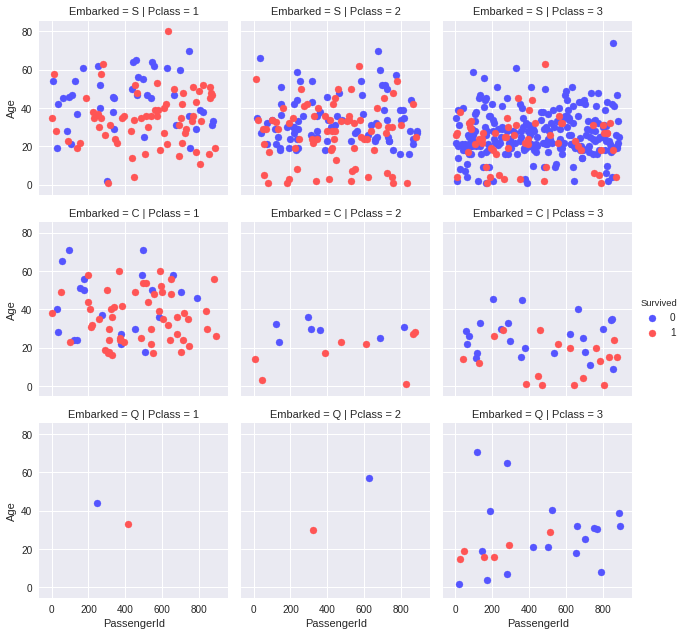

In [11]:
# embarked vs pclass vs survived
grid = sns.FacetGrid(df_train, col = "Pclass", row = "Embarked", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

### 5.2.3 - SibsSp vs Parch vs Pclass vs Survived vs Age

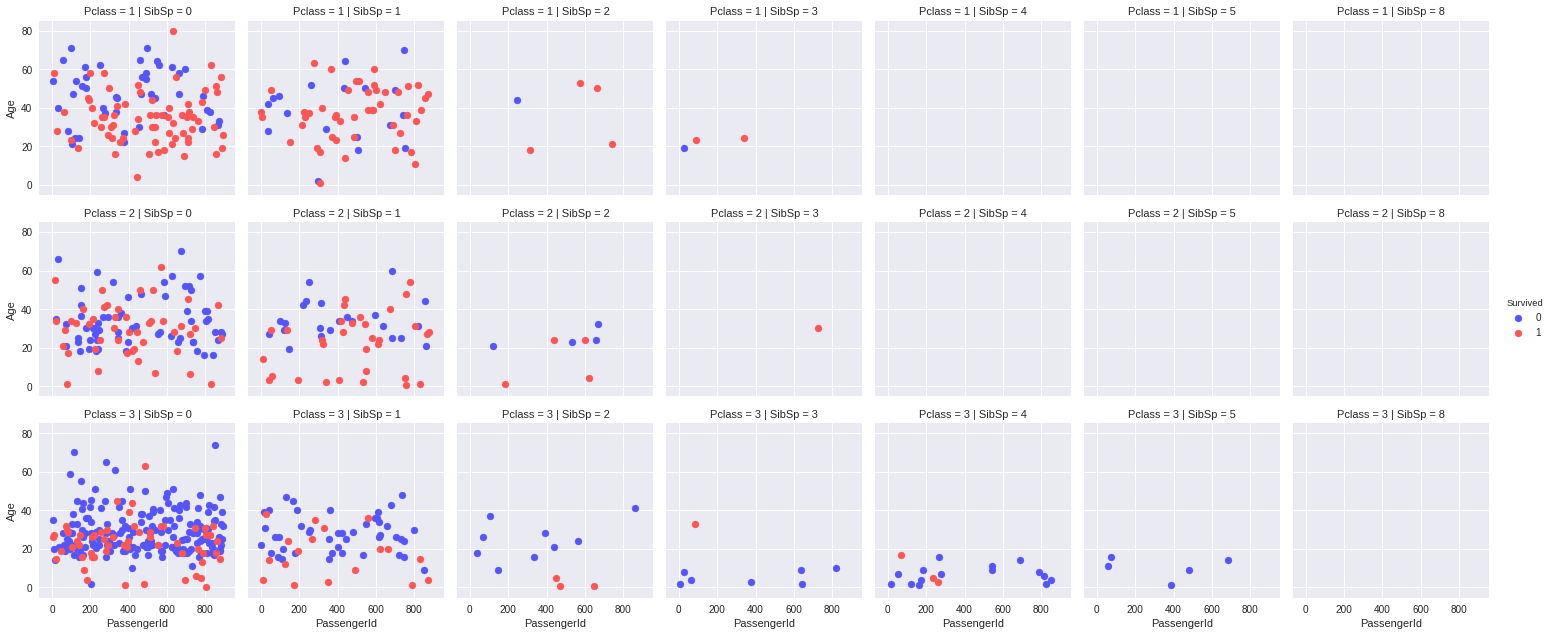

In [12]:
# some rows have nan values for age columns, thus they dont appear in the figure
# SibSp vs pclass vs survived
grid = sns.FacetGrid(df_train, col = "SibSp", row = "Pclass", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

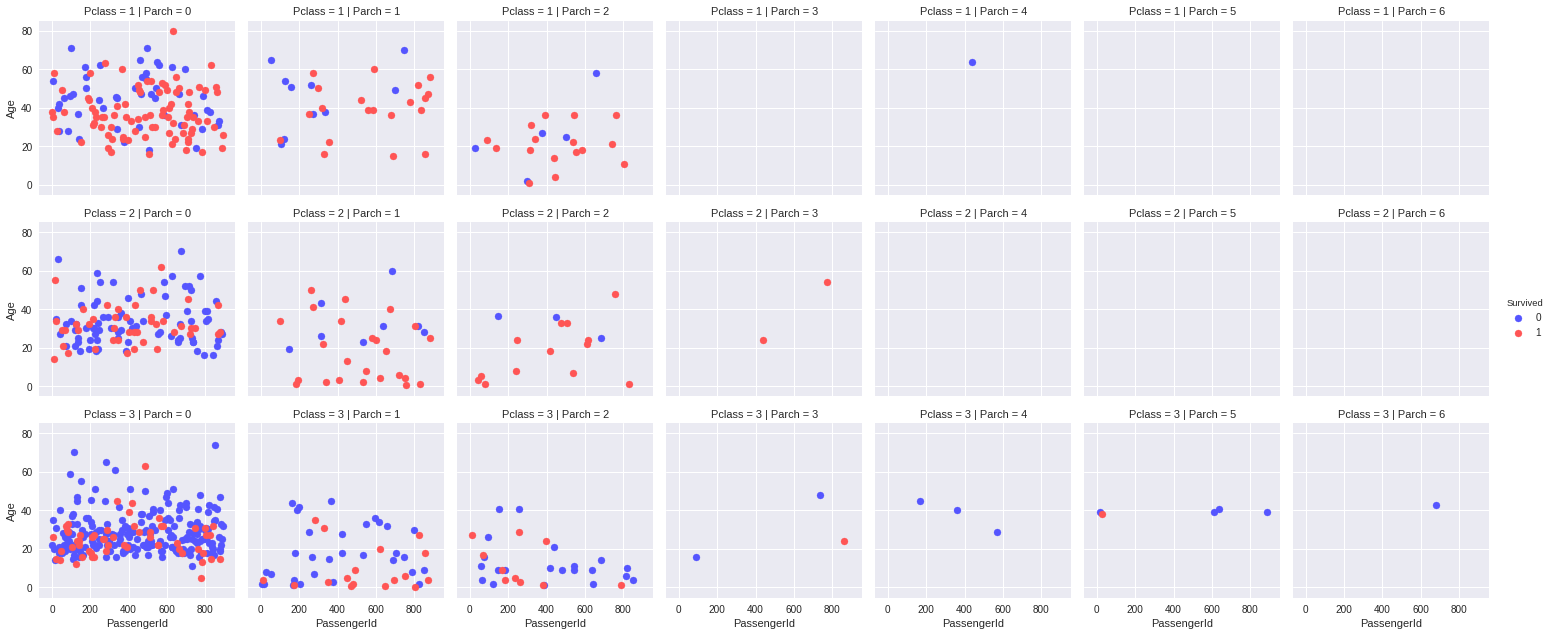

In [13]:
# Parch vs pclass vs survived
grid = sns.FacetGrid(df_train, col = "Parch", row = "Pclass", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

In [0]:
df_aux = df_train.copy()
df_aux['familysize'] = df_aux.SibSp + df_aux.Parch + 1

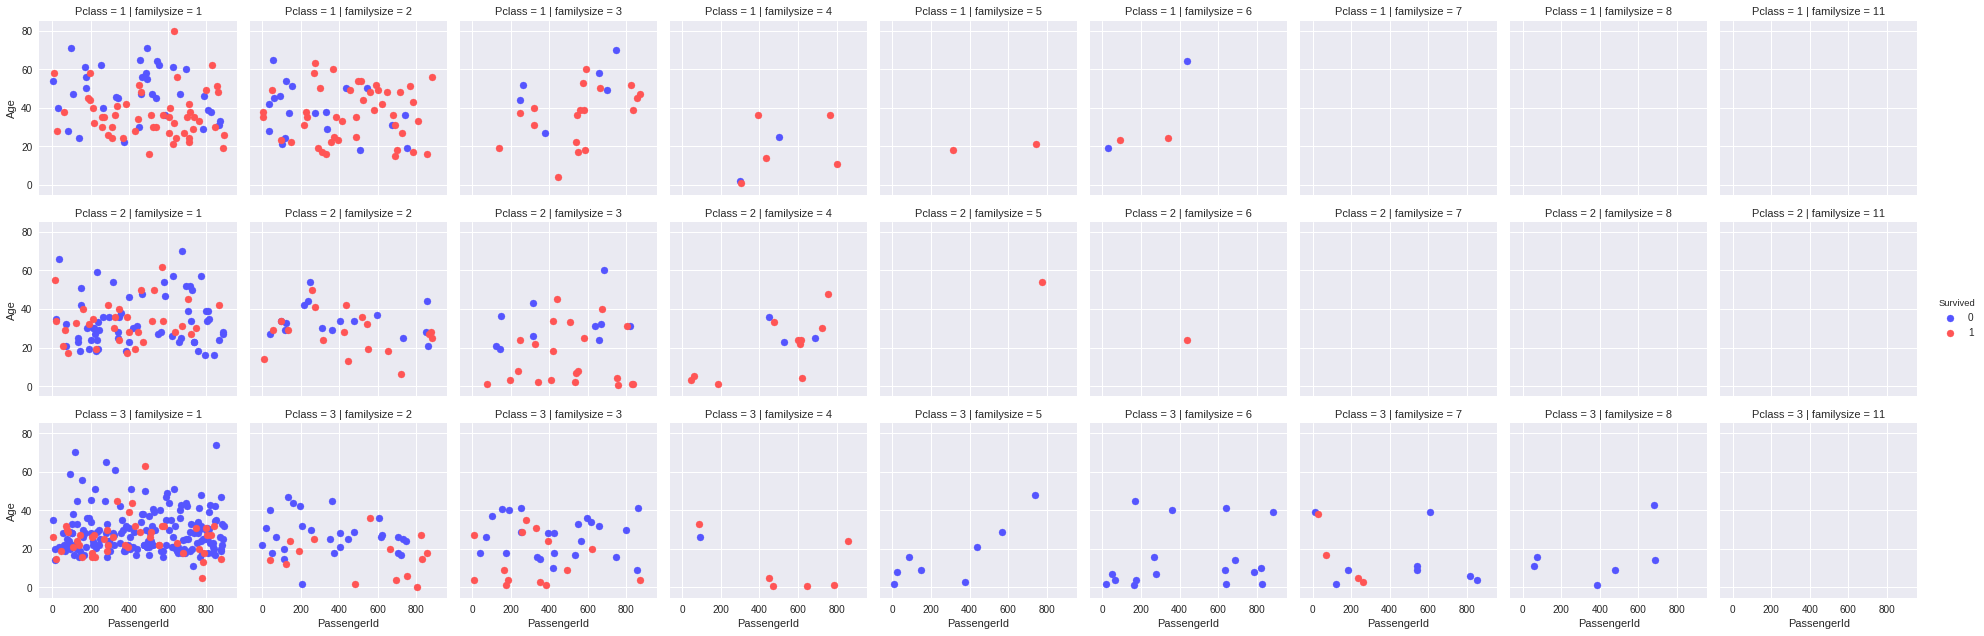

In [15]:
# Familysize vs pclass vs survived
grid = sns.FacetGrid(df_aux, col = "familysize", row = "Pclass", hue = "Survived", palette = 'seismic')
grid = grid.map(plt.scatter, "PassengerId", "Age")
grid.add_legend()
grid

### 5.2.4 - Age

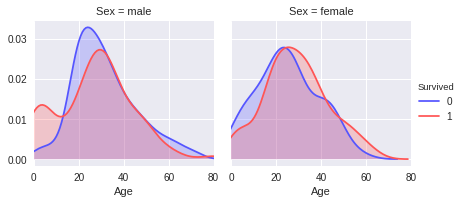

In [16]:
# Visualise Age Data 
facet = sns.FacetGrid(df_train, col="Sex", hue="Survived",palette = 'seismic')
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

In [0]:
df_aux["Age"] = df_aux["Age"].fillna(-0.5)
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
df_aux["Age_categories"] = pd.cut(df_aux["Age"],cut_points,labels=label_names)

In [18]:
df_aux.pivot_table(index='Age_categories', columns='Survived', values='Age', aggfunc='count')

Survived,0,1
Age_categories,,
Missing,125,52
Infant,13,31
Child,16,9
Teenager,40,30
Young Adult,221,137
Adult,117,78
Senior,17,5


### 5.2.5 - Fare

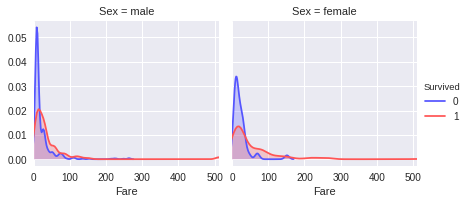

In [19]:
# Visualise Fare Data 
facet = sns.FacetGrid(df_train, col="Sex", hue="Survived",palette = 'seismic')
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()
#plt.xlim(140,170)

In [0]:
df_aux["Fare"] = df_aux["Fare"].fillna(df_aux["Fare"].mean())
cut_points = [-1,16,36,70,1000]
label_names = ["Low","Medium","High","Super-High"]
df_aux["Fare_categories"] = pd.cut(df_aux["Fare"],cut_points,labels=label_names)

In [21]:
df_aux.pivot_table(index=['Fare_categories','Sex'], columns='Survived', values='Age', aggfunc='count')

Survived                  0   1
Fare_categories Sex            
Low             female   43  83
                male    314  45
Medium          female   30  60
                male     88  34
High            female    6  28
                male     39  16
Super-High      female    2  62
                male     27  14

### 5.2.6 - Cabin

In [22]:
# fill Cabin NaN with U for unknown
df_aux.Cabin = df_aux.Cabin.fillna('U')

# map first letter of cabin to itself
df_aux.Cabin = df_aux.Cabin.map(lambda x: x[0])

df_aux.pivot_table(index='Cabin', columns='Survived', values='Age', aggfunc='count')

Survived,0,1
Cabin,,
A,8.0,7.0
B,12.0,35.0
C,24.0,35.0
D,8.0,25.0
E,8.0,24.0
F,5.0,8.0
G,2.0,2.0
T,1.0,NaN
U,481.0,206.0


### 5.2.7 - Ticket

In [0]:
# see https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
Ticket = []
for i in list(df_aux.Ticket):
    if not i.isdigit():
        #Take prefix
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) 
    else:
        Ticket.append("X")
df_aux["Ticket"] = Ticket

In [24]:
df_aux.pivot_table(index=['Ticket','Sex'], columns='Survived', values='Age', aggfunc='count')

Survived            0      1
Ticket  Sex                 
A4      male      7.0    NaN
A5      female    2.0    NaN
        male     17.0    2.0
AS      male      1.0    NaN
C       female    NaN    1.0
        male      3.0    1.0
CA      female    5.0   10.0
        male     22.0    4.0
CASOTON male      1.0    NaN
FC      male      1.0    NaN
FCC     female    NaN    4.0
        male      1.0    NaN
Fa      male      1.0    NaN
LINE    male      3.0    1.0
PC      female    1.0   28.0
        male     20.0   11.0
PP      female    NaN    2.0
        male      1.0    NaN
PPP     female    NaN    1.0
        male      1.0    NaN
SC      female    NaN    1.0
SCA4    male      1.0    NaN
SCAH    female    NaN    2.0
        male      1.0    NaN
SCOW    male      1.0    NaN
SCPARIS female    NaN    1.0
        male      4.0    2.0
SCParis female    NaN    2.0
        male      2.0    NaN
SOC     female    NaN    1.0
        male      5.0    NaN
SOP     male      1.0    NaN
SOPP    female    1.0    NaN
        male      2.0    NaN
SOTONO2 male      2.0    NaN
SOTONOQ female    1.0    NaN
        male     12.0    2.0
SP      male      1.0    NaN
STONO   male      7.0    5.0
STONO2  female    2.0    3.0
        male      1.0    NaN
SWPP    male      NaN    2.0
WC      female    5.0    1.0
        male      4.0    NaN
WEP     female    NaN    1.0
        male      2.0    NaN
X       female   64.0  175.0
        male    343.0   79.0

## 5.3 - Data preparation

In [0]:
def process_ticket(df):
    # see https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
    Ticket = []
    for i in list(df.Ticket):
        if not i.isdigit():
            #Take prefix
            Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) 
        else:
            Ticket.append("X")
    df["Ticket"] = Ticket
    return df

def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    df = process_missing(df)
    """
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    df["Cabin"] = df["Cabin"].fillna('U')

    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    df = process_age(df)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    df.drop("Age",inplace=True,axis=1)
    
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    df = process_fare(df)
    """
    cut_points = [-1,16,36,70,1000]
    label_names = ["Low","Medium","High","Super-High"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    df.drop("Fare",inplace=True,axis=1)
    
    return df


def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    df = process_titles(df)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    df.drop("Name",inplace=True,axis=1)
    
    return df

def process_family(df):
    """Process the SibSp and Parch columns into a family size column 

    Usage
    ------

    df = process_family(df)
    """
    df['familysize'] = df.SibSp + df.Parch + 1
    df.drop(["SibSp","Parch"],inplace=True,axis=1)
    return df

def process_cabin(df):
    # map first letter of cabin to itself
    df["Cabin"] = df["Cabin"].map(lambda x: x[0])
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    df = create_dummies(df,"column")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df.drop(column_name,inplace=True,axis=1)
    return df

In [0]:
def pre_process(df):
    df = process_ticket(df)
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_family(df)
    df = process_cabin(df)
    
    for col in ["Age_categories","Fare_categories","Sex","Pclass","Embarked","Title","Ticket","Cabin"]:
        df = create_dummies(df,col)
        
    return df

In [27]:
import pandas as pd

df_test = pd.read_csv("test.csv", sep = ",")
df_train = pd.read_csv("train.csv", sep = ",")

df_train = pre_process(df_train)
df_test =  pre_process(df_test)

train_shape = df_train.shape
test_shape = df_test.shape

print('Train:' + str(train_shape) + "\nTest: " + str(test_shape))

Train:(891, 68)
Test: (418, 63)


In [28]:
df_train.columns

Index(['PassengerId', 'Survived', 'familysize', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_Low',
       'Fare_categories_Medium', 'Fare_categories_High',
       'Fare_categories_Super-High', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Ticket_A4', 'Ticket_A5', 'Ticket_AS', 'Ticket_C',
       'Ticket_CA', 'Ticket_CASOTON', 'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa',
       'Ticket_LINE', 'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS',
       'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO',
     

In [29]:
df_test.columns 

Index(['PassengerId', 'familysize', 'Age_categories_Missing',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Fare_categories_Low',
       'Fare_categories_Medium', 'Fare_categories_High',
       'Fare_categories_Super-High', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3',
       'Ticket_AQ4', 'Ticket_C', 'Ticket_CA', 'Ticket_FC', 'Ticket_FCC',
       'Ticket_LP', 'Ticket_PC', 'Ticket_PP', 'Ticket_SC', 'Ticket_SCA3',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCPARIS', 'Ticket_SCParis',
       'Ticket_SOC', 'Ticket_SOPP', 'Ticket_SOTONO2', 'Ticket_SOTONOQ',
       'Ticket_STONO', 'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_WC',
       'Ticket_WE

In [0]:
## Filtering target columns

columns = list(df_test.columns & df_train.columns)
columns.remove("PassengerId")

# keras only suppport tensor, not dataframes
train_data = df_train[columns].as_matrix().astype('float32')
train_label = df_train.Survived.as_matrix().astype('float32')
test_data = df_test[columns].as_matrix().astype('float32')


In [31]:
train_data.shape

(891, 56)

In [32]:
train_label.shape

(891,)

In [33]:
test_data.shape

(418, 56)

## 5.4 - Exploring the Gridsearch to create models

In [34]:
# keras libraries
from keras import models
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


# Create different models
def create_model(id_model=0,
                 hidden=32,
                 activations="relu",
                 losses="binary_crossentropy"):
    
    model = models.Sequential()
    if id_model == 0:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 1:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 2:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 3:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 4:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 5:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dense(hidden//8, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 6:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 7:
        model.add(layers.Dense(hidden, activation=activations, input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 8:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//2, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//4, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden//8, activation=activations))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 9:
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.25))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.25))
        model.add(layers.Dense(1, activation='sigmoid'))
    elif id_model == 10: 
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],)))
        model.add(layers.Dropout(0.1))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.1))
        model.add(layers.Dense(1, activation='sigmoid'))
    else:
        # todo
        model.add(layers.Dense(hidden, activation=activations,input_shape=(train_data.shape[1],),
                               kernel_initializer="lecun_normal"))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(hidden, activation=activations))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(optimizer='rmsprop',loss=losses,metrics=['accuracy'])
    
    return model

Using TensorFlow backend.


In [0]:
# Wrap keras model so it can be used by scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Create hyperparameter space
hidden_units = [64]
activations_funct = ['relu']
loss_funct = ['binary_crossentropy']
id_models = [0,8]
epochs = [50]
batch_size = [50]


# Create hpyerparameter options
hyperparameters = dict(id_model=id_models, 
                       hidden=hidden_units,
                       activations=activations_funct,
                       losses=loss_funct,
                       epochs=epochs,
                       batch_size=batch_size,
                       verbose=[0])

# Create grid search
grid = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=3)

# Fit grid search
grid_results = grid.fit(train_data,train_label)

In [36]:
# summarize results
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

# Here test works as validation results
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
time_to_fit = grid_results.cv_results_['mean_fit_time']

for mean, stdev, duration, param in zip(means, stds, time_to_fit,params):
    print("%f (%f) (%f s) with: %r" % (mean, stdev, duration, param))
    

Best: 0.822671 using {'activations': 'relu', 'batch_size': 50, 'epochs': 50, 'hidden': 64, 'id_model': 8, 'losses': 'binary_crossentropy', 'verbose': 0}
0.806958 (0.034919) (3.839565 s) with: {'activations': 'relu', 'batch_size': 50, 'epochs': 50, 'hidden': 64, 'id_model': 0, 'losses': 'binary_crossentropy', 'verbose': 0}
0.822671 (0.017887) (4.616675 s) with: {'activations': 'relu', 'batch_size': 50, 'epochs': 50, 'hidden': 64, 'id_model': 8, 'losses': 'binary_crossentropy', 'verbose': 0}


In [37]:
grid_results.best_params_

{'activations': 'relu',
 'batch_size': 50,
 'epochs': 50,
 'hidden': 64,
 'id_model': 8,
 'losses': 'binary_crossentropy',
 'verbose': 0}

In [38]:
grid_results.best_score_

0.8226711420900492

In [39]:
grid_results.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([3.83956536, 4.61667458]),
 'mean_score_time': array([0.05157193, 0.12202191]),
 'mean_test_score': array([0.80695847, 0.82267114]),
 'mean_train_score': array([0.91582492, 0.85241302]),
 'param_activations': masked_array(data=['relu', 'relu'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_batch_size': masked_array(data=[50, 50],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_epochs': masked_array(data=[50, 50],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_hidden': masked_array(data=[64, 64],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_id_model': masked_array(data=[0, 8],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_losses': masked_array(data=['binary_crossentropy', 'binary_crossentropy'],
              mask=[False, Fa

## 5.5 - Creating a Submission File

The last thing we need to do is create a submission file. Each Kaggle competition can have slightly different requirements for the submission file. Here's what is specified on the [Titanic competition evaluation page](https://www.kaggle.com/c/titanic#evaluation):

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

The table below shows this in a slightly easier to understand format, so we can visualize what we are aiming for.

| PassengerId | Survived |
|-------------|----------|
| 892         | 0        |
| 893         | 1        |
| 894         | 0        |

In [0]:
submission = pd.DataFrame()
submission['PassengerId'] = df_test.PassengerId

best_model = grid_results.best_estimator_
submission['Survived'] = best_model.model.predict_classes(test_data)
# create a csv file
submission.to_csv("submission_model.csv",index=False)

In [0]:
# save your model to a file
best_model.model.save("model.h5")

In [0]:
from keras.models import load_model

# load the model
model = load_model("model.h5")

| Model | #Hidden |#Epochs | #Batch | Duration (seconds)     |#Evaluation (accuracy) |
|-------|---------|--------|--------|------------------------|-----------------------| 
|   0   |   64    | 50     |   5    |      24.6677           |0.75598|
|   **0**   |   **64**    | **100**    |   **5**    |      **55.8466**          |**0.78468**|
|   0   |   64    | 200    |   10   |       46.9868          |0.65071|
|   0   |   64    | 200    |    5   |       90.1741          |0.74641|
|   0   |   64    | 200    |    1   |       423.4022         |0.62679|
|   1   |   64    | 50     |   5    |      30.8114           |0.76076|
|   **1**   |   **64**    | **100**    |   **5**    |      **61.6201**           |**0.77033** |
|   1   |   64    | 200    |    10  |       52.6762          |0.66507|
|   1   |   64    | 200    |    5   |       108.1706         |0.75598|
|   1   |   64    | 200    |    1   |       400.0676         |0.76555|
|   2   |   64    | 50    |    5   |       33.2243          |0.58373|
|   2   |   64    | 200    |    10  |       58.2829          |0.37320|
|   2   |   64    | 200    |    5   |       102.1780         |0.61722 |
|   2   |   64    | 200    |    1   |       422.3558         |0.62679 |
|   3   |   64    | 50    |    5   |       27.8506          |0.75598 |
|   3   |   64    | 100   |    5   |       54.3490          |0.74641|
|   3   |   64    | 200    |    10  |       44.1178          |0.74162 |
|   **3**   |   **64**    | **200**    |    **5**   |       **76.0296**          |**0.78947**|
|   3   |   64    | 200    |    1   |       346.2057         |0.37320|
|   4   |   64    | 50    |   5    |       28.5832          |0.76555|
|   4   |   64    | 100   |   5     |       53.2381         | 0.37320|
|   4   |   64    | 200    |    10  |       51.5426          |0.75598|
|   4   |   64    | 200    |    5   |       81.6649          |0.75119 |
|   4   |   64    | 200    |    1   |       392.3536         |0.64114 |
|   5   |   64    | 50    |    5   |       30.5885          |0.56937|
|   **5**   |   **64**    | **100**   |  **5**      |       **57.6668**         | **0.78947**|
|   5   |   64    | 200    |    10  |       51.5978          |0.76076 |
|   5   |   64    | 200    |    5   |       88.0420          |0.77033|
|   5   |   64    | 200    |    1   |       438.3351         |0.66985|
|   **6**   |   **64**    | **100**    |    **5**   |       **77.0347**          |**0.78468**|
|   6   |   64    | 200    |    5   |       147.0646         |0.61244|
|   7   |   64    | 100    |    5   |       74.4839          |0.77033|
|   7   |   64    | 200    |    5   |       129.3385          |0.75598|
|   8   |   64    | 100    |    5   |       94.0294          |0.60287|
|   8   |   64    | 200    |    5   |       144.4415         |0.62679|
|   9   |   64    | 100    |    5   |       77.1295        |0.75598|
|   10   |   64    | 100    |    5   |       72.7501       |0.73684